In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import spearmanr
import math
from scipy.interpolate import make_interp_spline


In [341]:
data=pd.read_csv("testmark.csv")

In [342]:
data=data[data["marks"]!="A"]
data["marks"]=data["marks"].astype(int)
data["smarks"]=data["smarks"].astype(int)


In [343]:
data.describe()

,marks,smarks
count,25.00000,25.000000
mean,65.20000,59.320000
std,14.96663,13.328291
min,31.00000,36.000000
25%,59.00000,50.000000
50%,64.00000,59.000000
75%,80.00000,70.000000
max,91.00000,85.000000


In [344]:
data

,names,marks,smarks
0,a,67,60
1,b,70,65
2,c,31,36
3,d,56,55
4,f,82,80
5,g,83,76
6,h,62,55
7,i,81,70
8,j,59,45
9,k,40,40


In [345]:
marks=data["marks"]
print(marks.min())
ov=marks.min()/10
print(ov)
per=False
if ov%1==0.0:
    per=True
wv=int(ov)*10
if per:
    wv=wv-10
print(wv)


31
3.1
30


In [346]:
#bins=[41,50,51,60]
print(wv)
bins=[]
for v in np.arange(wv,100+1,10):
    bins.append(v)
    #bins.append(val+9)
print(bins)
print("--------------------------------------")
midpoint=[]
for i,e in enumerate(bins):
    if i<len(bins)-1:
        midpoint.append(((bins[i+1]-e)/2)+e)
print(midpoint)
    

30
[30, 40, 50, 60, 70, 80, 90, 100]
--------------------------------------
[35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0]


In [347]:
ftable=pd.cut(marks,bins=bins,include_lowest=True,right=False)
ftable=pd.value_counts(ftable,sort=False).reset_index()
ftable.columns=["intervels","frequency"]
print("frequency table intervels")
print(ftable)
total=ftable["frequency"].sum()
print(f"total: {total}")
cf=ftable["frequency"].cumsum()
print(f"cumulative frequency:{cf}")

frequency table intervels
   intervels  frequency
0   [30, 40)          1
1   [40, 50)          2
2   [50, 60)          5
3   [60, 70)          8
4   [70, 80)          2
5   [80, 90)          5
6  [90, 100)          2
total: 25
cumulative frequency:0     1
1     3
2     8
3    16
4    18
5    23
6    25
Name: frequency, dtype: int64


In [348]:
fx=[]
for i,e in enumerate(midpoint):
    mul=e*ftable["frequency"][i]
    fx.append(mul)
print(fx)
fxsum=sum(fx)
print(fxsum)

fxmean=fxsum/total
print("mean :",fxmean)



[35.0, 90.0, 275.0, 520.0, 150.0, 425.0, 190.0]
1685.0
mean : 67.4


In [349]:
n=total/2
print(n)
midvalue=0
cfvalue=0
fvalue=0
low=0
newmedian=0
for i,e in enumerate(cf):
    if n<e:
        midvalue=e
        cfvalue=cf[i-1]
        fvalue=ftable["frequency"][i]
        low=bins[i]
        break
print(midvalue)
print(cfvalue)
print(fvalue)
print(low)

newmedian=low+((((n)-cfvalue)/fvalue)*10)
print("meadian:",newmedian)

newmod=3*newmedian-2*fxmean
print(f"mode={newmod}")

R=max(marks)-min(marks)
print(f"range={R}")
      

12.5
16
8
8
60
meadian: 65.625
mode=62.07499999999999
range=60


In [350]:
print(fxmean)
avgd=0
div=0
fdiv=[]
sumfdiv=0
for i,e in enumerate(midpoint):
    div=midpoint-fxmean
print(div)
print("-----------------------------------")
for i,e in enumerate(div):
    if e<0:
        div[i]=np.abs(e)
print(div)
print("-------------------------------------")
for i,e in enumerate(div):
    fdiv.append(e*ftable["frequency"][i])
print(fdiv)
sumfdiv=sum(fdiv)
print(sumfdiv)
avgd=sumfdiv/total
print(avgd)

67.4
[-32.4 -22.4 -12.4  -2.4   7.6  17.6  27.6]
-----------------------------------
[32.4 22.4 12.4  2.4  7.6 17.6 27.6]
-------------------------------------
[32.400000000000006, 44.80000000000001, 62.00000000000003, 19.200000000000045, 15.199999999999989, 87.99999999999997, 55.19999999999999]
316.8
12.672


In [351]:
sd=0
print(midpoint)
d=[]
assume=65
sqrd=[]
fd=[]
sqrd2=[]
for i,e in enumerate(midpoint):
    d.append((e-assume)/10)
print(d)
for i,e in enumerate(d):
    sqrd.append(e*e)
print(sqrd)
print(ftable["frequency"])   


for i,e in enumerate(d):
    fd.append(e*ftable["frequency"][i])
print(fd)

for i,e in enumerate(sqrd):
    sqrd2.append(e*ftable["frequency"][i])
print(sqrd2)

sumfd=sum(fd)
sumsqrfd=sum(sqrd2)
print(sumfd)
print(sumsqrfd)

sd1=sumsqrfd/total
print(sd1)

s=sumfd/total
print(s)

sd2=s*s
print(sd2)

sd3=sd1-sd2
print(sd3)

sd4=math.sqrt(sd3)
print(sd4)

sd=sd4*10
print(f"standard deviation is :{sd}")

[35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0]
[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0]
[9.0, 4.0, 1.0, 0.0, 1.0, 4.0, 9.0]
0    1
1    2
2    5
3    8
4    2
5    5
6    2
Name: frequency, dtype: int64
[-3.0, -4.0, -5.0, 0.0, 2.0, 10.0, 6.0]
[9.0, 8.0, 5.0, 0.0, 2.0, 20.0, 18.0]
6.0
62.0
2.48
0.24
0.0576
2.4224
1.5564061166674976
standard deviation is :15.564061166674977


In [352]:
qd1=0
#Q1 = L1 +((n4−𝑐𝑓1)/𝑓1) X 10
n1=total/4
print(n1)
m1=0
l1=0
cf1=0
f1=0
for i,e in enumerate(cf):
    if n1<e:
        m1=e
        cf1=cf[i-1]
        f1=ftable["frequency"][i]
        l1=bins[i]
        break
print(m1)
print(cf1)
print(f1)
print(l1)

qd1=l1+((((n1)-cf1)/f1)*10)
print(qd1)

print("-------------------------------------------------")

qd3=0
#Q3 = L3 +((3*n4−𝑐𝑓3)/𝑓3) X 10
n3=3*total/4
print(n3)
m3=0
l3=0
cf3=0
f3=0
for i,e in enumerate(cf):
    if n3<e:
        m3=e
        cf3=cf[i-1]
        f3=ftable["frequency"][i]
        l3=bins[i]
        break
print(m3)
print(cf3)
print(f3)
print(l3)

qd3=l3+((((n3)-cf3)/f3)*10)
print(qd3)

qd=(qd3-qd1)/2
print(f"quartile deviation is :{qd}")


6.25
8
3
5
50
56.5
-------------------------------------------------
18.75
23
18
5
80
81.5
quartile deviation is :12.5


In [353]:
smarks=data["smarks"]
mranks=[]
smranks=[]

mranks = [sorted(marks,reverse=True).index(x) + 1 for x in marks]
smranks = [sorted(smarks,reverse=True).index(x) + 1 for x in smarks]


print("Subject 1 Ranks:", mranks)
print("Subject 2 Ranks:", smranks)

diff=[]
for i,e in enumerate(mranks):
    diff.append(e-smranks[i])
print(diff)
print("----------------------------------------")

diff2=[]
for i,e in enumerate(diff):
    diff2.append(e*diff[i])
print(diff2)

print("--------------------------------")

sumdiff=0
sumdiff=sum(diff2)
print(sumdiff)

r=6*sumdiff
print(r)

t=total*total
print(t)

t2=t-1
print(t2)

t3=total*t2
print(t3)

rc1=r/t3
print(rc1)

rank_correlation=1-rc1
print(rank_correlation)

Subject 1 Ranks: [10, 9, 25, 21, 4, 3, 14, 5, 18, 24, 1, 8, 20, 11, 12, 16, 2, 5, 22, 15, 12, 23, 16, 7, 18]
Subject 2 Ranks: [10, 8, 25, 16, 3, 4, 16, 7, 22, 24, 1, 9, 15, 10, 12, 14, 2, 5, 21, 19, 18, 23, 12, 6, 20]
[0, 1, 0, 5, 1, -1, -2, -2, -4, 0, 0, -1, 5, 1, 0, 2, 0, 0, 1, -4, -6, 0, 4, 1, -2]
----------------------------------------
[0, 1, 0, 25, 1, 1, 4, 4, 16, 0, 0, 1, 25, 1, 0, 4, 0, 0, 1, 16, 36, 0, 16, 1, 4]
--------------------------------
157
942
625
624
15600
0.060384615384615384
0.9396153846153846


[35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0]
0    1
1    2
2    5
3    8
4    2
5    5
6    2
Name: frequency, dtype: int64


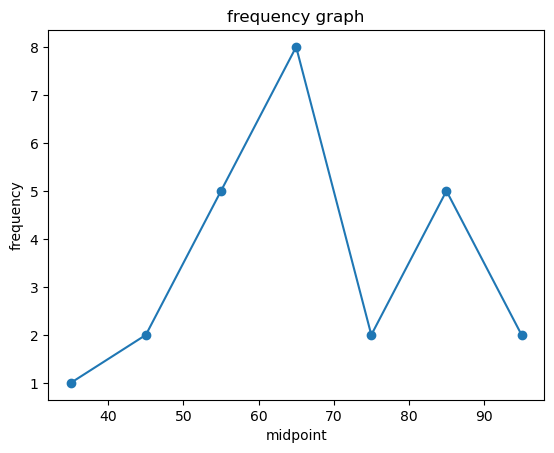

In [354]:
print(midpoint)
print(ftable["frequency"])

x_value=midpoint
y_value=ftable["frequency"]
#plt.figure(figsize=(7,6))
plt.plot(x_value,y_value,marker='o',linestyle='-')
plt.title('frequency graph')
plt.xlabel('midpoint')
plt.ylabel('frequency')
plt.show()

[35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0]
0    1
1    2
2    5
3    8
4    2
5    5
6    2
Name: frequency, dtype: int64


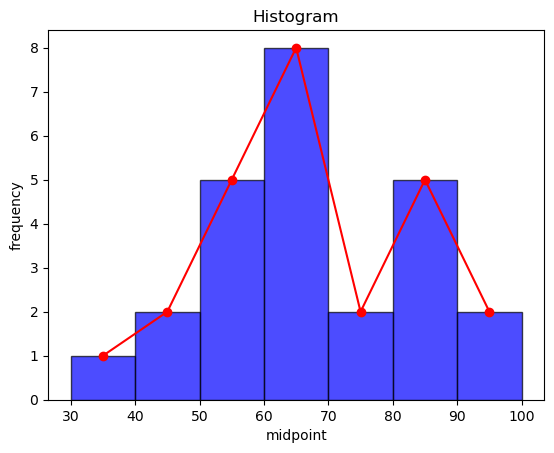

In [355]:


x_values=midpoint
y_values=ftable["frequency"]

print(x_values)
print(y_values)
plt.bar(x_values,y_values,width=10,alpha=0.7,color='blue',edgecolor='black')
#plt.hist(y_values,bins=20)
plt.plot(x_values,y_values,marker='o',linestyle='-',color='red')
plt.title('Histogram')
plt.xlabel('midpoint')
plt.ylabel('frequency')
plt.show()

0     1
1     3
2     8
3    16
4    18
5    23
6    25
Name: frequency, dtype: int64
0     [30, 40)
1     [40, 50)
2     [50, 60)
3     [60, 70)
4     [70, 80)
5     [80, 90)
6    [90, 100)
Name: intervels, dtype: category
Categories (7, interval[int64, left]): [[30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90) < [90, 100)]
0     40
1     50
2     60
3     70
4     80
5     90
6    100
Name: intervels, dtype: category
Categories (7, int64): [40 < 50 < 60 < 70 < 80 < 90 < 100]
0    1
1    2
2    5
3    8
4    2
5    5
6    2
Name: frequency, dtype: int64
24-2
22-5
17-8
9-2
7-5
2-2
[25, 24, 22, 17, 9, 7, 2]
0    30
1    40
2    50
3    60
4    70
5    80
6    90
Name: intervels, dtype: category
Categories (7, int64): [30 < 40 < 50 < 60 < 70 < 80 < 90]
----------------------------
0     40
1     50
2     60
3     70
4     80
5     90
6    100
Name: intervels, dtype: category
Categories (7, int64): [40 < 50 < 60 < 70 < 80 < 90 < 100]
0     1
1     3
2     8
3    16
4    18
5

NameError: name 'geom' is not defined

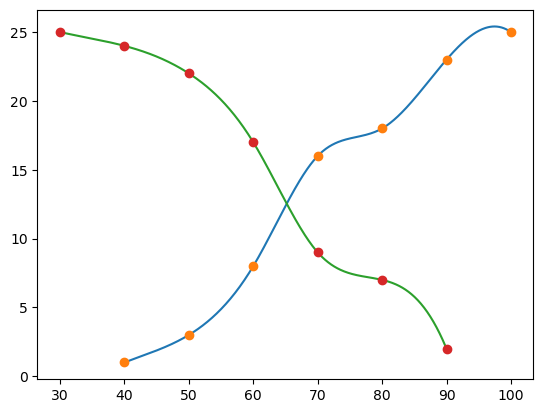

In [356]:
print(cf)
intervels=ftable["intervels"]
print(intervels)

uvalue=intervels.apply(lambda x:x.right)
print(uvalue)


x=uvalue
y=cf
x_y_spline=make_interp_spline(x,y)
x_=np.linspace(x.min(),x.max(),500)
y_=x_y_spline(x_)
plt.plot(x_,y_)
plt.plot(x,y,marker='o',linestyle='')

print(ftable["frequency"])

more_cf=[]

for i,e in enumerate(ftable["frequency"]):
    if i==0:
        more_cf.append(total)
        more_cf.append(total-e)
    else:
        print(f"{more_cf[i]}-{e}")
        more_cf.append(more_cf[i]-e)
more_cf.pop()
print(more_cf)

lvalue=intervels.apply(lambda x:x.left)
print(lvalue)
x1=lvalue
y1=more_cf
x1_y1_spline=make_interp_spline(x1,y1)
x1_=np.linspace(x1.min(),x1.max(),500)
y1_=x1_y1_spline(x1_)
plt.plot(x1_,y1_)
plt.plot(x1,y1,marker='o',linestyle='')
plt.show
print("----------------------------")
print(x)
print(y)
print(x1)
print(y1)


# intersection_point = None
# for i in range(len(x)):
#     if (x[i],y[i]) in zip(x1, y1):
#         intersection_point = (x[i],y[i])
#         break

# if intersection_point:
#     plt.plot(intersection_point[0], intersection_point[1], 'ro', label='Intersection')



# intersection_x = list(set(x) & set(x1))
# intersection_y = [y[x.index(intersect)] for intersect in intersection_x]

# plt.plot(intersection_x, intersection_y, 'ro', label='Intersection')

# print(f"Intersection values: {list(zip(intersection_x, intersection_y))}")

# #print(intersection_point)



# points=list(zip(x,y))
# print(points)
# points2=list(zip(x1,y1))
# print(points2)

# set1=set(points)
# set2=set(points2)
# intersect=set1.intersection(set2)
# print(intersect)


line_1=geom.LineString(np.column_stack((x,y)))
line_2=geom.LineString(np.column_stack((x1,y1)))
intersection=line_1.intersection(line_2)
plt.plot(*intersection.xy,'ro')
plt.show()

In [ ]:
# def find_intersection_point(line1, line2):
#     """Find the intersection point of two lines."""
#     x1, y1 = line1[0]
#     x2, y2 = line1[1]
#     m1 = (y2 - y1) / (x2 - x1)
#     b1 = y1 - m1 * x1

#     x3, y3 = line2[0]
#     x4, y4 = line2[1]
#     m2 = (y4 - y3) / (x4 - x3)
#     b2 = y3 - m2 * x3

#     # Calculate intersection point
#     x_intersect = (b2 - b1) / (m1 - m2)
#     y_intersect = m1 * x_intersect + b1

#     return x_intersect, y_intersect

# # Example lines (represented by two points each)
# line1 =points
# line2 =points2

# # Find and print the intersection point
# intersection_point = find_intersection_point(line1, line2)
# print("Intersection point:", intersection_point)

In [ ]:
print("bargraph")
t=sum(marks)
print(t)
t1=t/total
print(t1)

st=sum(smarks)
print(st)
t2=st/total
print(t2)
labels=['t1','t2']
y=[t1,t2]

plt.bar(labels,y,color='blue',edgecolor='black')

plt.show


In [ ]:
dataset1=[(1,2),(2,4),(3,6)]
dataset2=[(2,4),(4,8),(6,12)]
set1=set(dataset1)
set2=set(dataset2)
intersect=set1.intersection(set2)
print(intersect)

In [ ]:
X = [40, 50, 60, 70, 80, 90, 100]
Y = [1, 3, 8, 16, 18, 23, 25]

X1 = [30, 40, 50, 60, 70, 80, 90]
Y1 = [25, 24, 22, 17, 9, 7, 2]

# Plotting the first set of points (X, Y)
plt.plot(X, Y, label='(X, Y)', marker='o')

# Plotting the second set of points (X1, Y1)
plt.plot(X1, Y1, label='(X1, Y1)', marker='o')

# Finding the intersection point
intersection_point = None
for i in range(len(X)):
    if (X[i], Y[i]) in zip(X1, Y1):
        intersection_point = (X[i], Y[i])
        #break

if intersection_point:
    plt.plot(intersection_point[0], intersection_point[1], 'ro', label='Intersection')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of X, Y, X1, Y1')
plt.legend()
plt.grid()
plt.show()

print(f"Intersection point: {intersection_point}")

